## Analysis of A/B Test Experimentation Results



### Disclaimer on Analysis of data set
For the purpose of simulating the analysis part of this experiment(see the Research Proposal at the end of this notebook), we would assume that the data set was collected twice. The first part of the experiemnt would be analysed with the data when the test was in progress and the other part of the experiment would use the full version of the data set upon completion of the experiment 

Also we would assume jobseekers with Linkedin embed on their profile and jobseekers without Linkedin embed on their profile in the Research proposal, represent the male and female employees in our data set repectively

Similarly we would equally assume that the the base salary represent the status of employment of the jobseekers stated in the Research Proposal.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
PATH = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/employee.csv'
applyme = pd.read_csv(PATH)

In [3]:
applyme.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [4]:
applyme.tail()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02
1999,1999,FIRE FIGHTER,Houston Fire Department (HFD),51194.0,Hispanic/Latino,Full Time,Male,Active,2009-01-12,2010-07-12


In [5]:
applyme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
UNIQUE_ID            2000 non-null int64
POSITION_TITLE       2000 non-null object
DEPARTMENT           2000 non-null object
BASE_SALARY          1886 non-null float64
RACE                 1965 non-null object
EMPLOYMENT_TYPE      2000 non-null object
GENDER               2000 non-null object
EMPLOYMENT_STATUS    2000 non-null object
HIRE_DATE            2000 non-null object
JOB_DATE             1997 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 156.3+ KB


In [6]:
applyme.shape

(2000, 10)

In [7]:
applyme.isnull().sum()

UNIQUE_ID              0
POSITION_TITLE         0
DEPARTMENT             0
BASE_SALARY          114
RACE                  35
EMPLOYMENT_TYPE        0
GENDER                 0
EMPLOYMENT_STATUS      0
HIRE_DATE              0
JOB_DATE               3
dtype: int64

In [8]:
applyme['BASE_SALARY'].fillna(applyme['BASE_SALARY'].mean(), inplace=True)
applyme['RACE'].fillna(method='ffill',inplace=True)
applyme['JOB_DATE'].fillna(method='ffill',inplace=True)


In [9]:
applyme.isnull().sum()

UNIQUE_ID            0
POSITION_TITLE       0
DEPARTMENT           0
BASE_SALARY          0
RACE                 0
EMPLOYMENT_TYPE      0
GENDER               0
EMPLOYMENT_STATUS    0
HIRE_DATE            0
JOB_DATE             0
dtype: int64

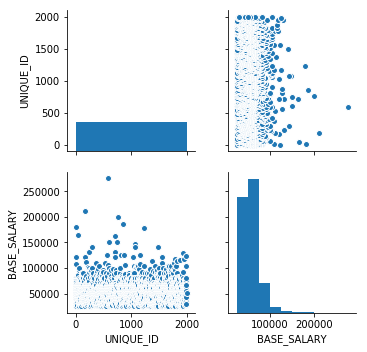

In [10]:
sns.pairplot(applyme)

### Testing the propose solution prior to the end of the experiment
#### Data collected in one month of the experiment

In [26]:
#divid the data into two part
applyme_part1 = applyme.iloc[0:50, :]

In [27]:
applyme_part1.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [28]:
applyme_part1.shape

(50, 10)

In [29]:
applyme_part1.isnull().sum()

UNIQUE_ID            0
POSITION_TITLE       0
DEPARTMENT           0
BASE_SALARY          0
RACE                 0
EMPLOYMENT_TYPE      0
GENDER               0
EMPLOYMENT_STATUS    0
HIRE_DATE            0
JOB_DATE             0
dtype: int64

### The employee status rate of jobseekers with Linkedin embed and jobseeker without the Linkedin emded

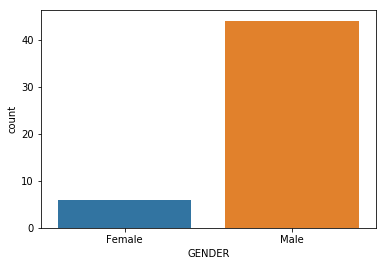

In [37]:
sns.countplot('GENDER',data=applyme_part1)

In [36]:
applyme_part1[applyme_part1.GENDER=='Male']

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.000000,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.000000,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.000000,White,Full Time,Male,Active,1989-06-19,1994-10-22
5,5,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.000000,Black or African American,Full Time,Male,Active,1984-11-26,2005-03-26
6,6,ENGINEER,Public Works & Engineering-PWE,71680.000000,Asian/Pacific Islander,Full Time,Male,Active,2012-03-26,2012-03-26
7,7,CARPENTER,Houston Airport System (HAS),42390.000000,White,Full Time,Male,Active,2013-11-04,2013-11-04
8,8,DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV,Public Works & Engineering-PWE,107962.000000,White,Full Time,Male,Active,1993-11-15,2013-01-05
9,9,AIRPORT OPERATIONS COORDINATOR,Houston Airport System (HAS),44616.000000,White,Full Time,Male,Active,2016-03-14,2016-03-14
10,10,FIRE FIGHTER,Houston Fire Department (HFD),52644.000000,Hispanic/Latino,Full Time,Male,Active,2007-05-21,2008-11-15
11,11,"CHIEF PHYSICIAN,MD",Health & Human Services,180416.000000,Black or African American,Full Time,Male,Active,1987-05-22,1999-08-28


In [40]:
applyme_part1[applyme_part1.GENDER=='Female']

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
35,35,DENTAL ASSISTANT,Health & Human Services,34923.0,Black or African American,Full Time,Female,Active,1982-04-05,1990-11-03
36,36,SENIOR INSPECTOR,Public Works & Engineering-PWE,60258.0,White,Full Time,Female,Active,2004-08-03,2007-03-10
38,38,SENIOR MICROCOMPUTER ANALYST,Health & Human Services,67499.0,Asian/Pacific Islander,Full Time,Female,Active,1994-06-29,1997-08-30
47,47,CUSTOMER SERVICE SUPERVISOR,Public Works & Engineering-PWE,43618.0,Black or African American,Full Time,Female,Active,2007-12-15,2015-11-07


### Testing the propose solution with one month data
* Hypothesis: The average employment status of jobseeker with the Linkedin embed on their profile is  than jobseekers without the Linkedin embed on their profile
* Null Hypothesis: There is no difference in the average employment status

From the result of the T-test, the p-value: 0.8510193099462344 is greater than 0.05. This imply that there is no significant difference in the employemnt status of jobseekers that have the Linkedin embed on their profile and jobseeker that do not have the Linkedin embed on their profile, consequently we would accept the null hypothesis and reject the hypothesis. This invariable implies that the redesign of the *applyme* platform would be left the way it is currently as there would be no significant benefit in redesigning the platform.

In [39]:
applyme_part1[applyme_part1.GENDER=='Male'].BASE_SALARY.mean()

61465.40442735949

In [41]:
applyme_part1[applyme_part1.GENDER=='Female'].BASE_SALARY.mean()

59047.5

In [43]:
stats.ttest_ind(applyme_part1[applyme_part1.GENDER=='Female'].BASE_SALARY,applyme_part1[applyme_part1.GENDER=='Male'].BASE_SALARY)

Ttest_indResult(statistic=-0.18883371326810142, pvalue=0.8510193099462344)

In [45]:
0.8510193099462344 > 5/100

True

### Testing the propose solution at the end of the experiment
#### Analysis of Data collected after  six month

### The employee status rate of jobseekers with Linkedin embed and jobseeker without the Linkedin emded

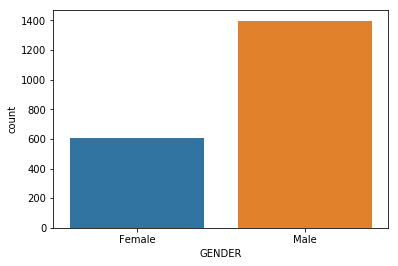

In [46]:
sns.countplot('GENDER', data=applyme)

In [47]:
applyme[applyme.GENDER=='Male']

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.000000,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.000000,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.000000,White,Full Time,Male,Active,1989-06-19,1994-10-22
5,5,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.000000,Black or African American,Full Time,Male,Active,1984-11-26,2005-03-26
6,6,ENGINEER,Public Works & Engineering-PWE,71680.000000,Asian/Pacific Islander,Full Time,Male,Active,2012-03-26,2012-03-26
7,7,CARPENTER,Houston Airport System (HAS),42390.000000,White,Full Time,Male,Active,2013-11-04,2013-11-04
8,8,DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV,Public Works & Engineering-PWE,107962.000000,White,Full Time,Male,Active,1993-11-15,2013-01-05
9,9,AIRPORT OPERATIONS COORDINATOR,Houston Airport System (HAS),44616.000000,White,Full Time,Male,Active,2016-03-14,2016-03-14
10,10,FIRE FIGHTER,Houston Fire Department (HFD),52644.000000,Hispanic/Latino,Full Time,Male,Active,2007-05-21,2008-11-15
11,11,"CHIEF PHYSICIAN,MD",Health & Human Services,180416.000000,Black or African American,Full Time,Male,Active,1987-05-22,1999-08-28


In [48]:
applyme[applyme.GENDER=='Female']

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.000000,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.000000,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
35,35,DENTAL ASSISTANT,Health & Human Services,34923.000000,Black or African American,Full Time,Female,Active,1982-04-05,1990-11-03
36,36,SENIOR INSPECTOR,Public Works & Engineering-PWE,60258.000000,White,Full Time,Female,Active,2004-08-03,2007-03-10
38,38,SENIOR MICROCOMPUTER ANALYST,Health & Human Services,67499.000000,Asian/Pacific Islander,Full Time,Female,Active,1994-06-29,1997-08-30
47,47,CUSTOMER SERVICE SUPERVISOR,Public Works & Engineering-PWE,43618.000000,Black or African American,Full Time,Female,Active,2007-12-15,2015-11-07
55,55,ADMINISTRATIVE ASSOCIATE,Houston Police Department-HPD,34757.000000,Black or African American,Full Time,Female,Active,2005-05-11,2008-05-17
61,61,IT PROJECT MANAGER,Houston Fire Department (HFD),96668.000000,Black or African American,Full Time,Female,Active,1998-04-07,2006-01-28
63,63,LABORER,Public Works & Engineering-PWE,26125.000000,Black or African American,Full Time,Female,Active,2001-05-21,2001-05-21
66,66,"PUBLIC HEALTH DENTIST,DDS",Health & Human Services,100791.000000,White,Full Time,Female,Active,2015-12-28,2015-12-28


In [49]:
applyme[applyme.GENDER=='Female'].BASE_SALARY.mean()

52323.54597285749

In [51]:
applyme[applyme.GENDER=='Male'].BASE_SALARY.mean()

57254.66355111803

### Testing the propose solution with the six month data
* Hypothesis: The average employment status of jobseeker with the Linkedin embed on their profile is  than jobseekers without the Linkedin embed on their profile
* Null Hypothesis: There is no difference in the average employment status

From the result of the T-test, the p-value is less than 0.05. This imply that there is a significant difference in the employment status of Jobseekers with the Linkedin embed on their profile. This result support our hypothesis so therefore we would reject the null hypothesis. Consequently we would redesign the *Applyme* platform in way that each jobseeker must have the Linkedin embed on their respective profiles.


In [52]:
stats.ttest_ind(applyme[applyme.GENDER=='Male'].BASE_SALARY,applyme[applyme.GENDER=='Female'].BASE_SALARY)

Ttest_indResult(statistic=4.830777984447231, pvalue=1.4634813256283648e-06)

In [53]:
1.4634813256283648e-06 > 5/100

False

## Research Proposal (A/B Test)

###  Introduction and Statement of Problem 

Our startup name is Applyme. Applyme is rewriting the rule of  employment agency. Our business model is a total deviation from the convention of talent sourcing and head hunting.   Rather than jobseeker applying to jobs, our platform makes potential employers apply to potential jobseekers. In order words, our clients seeking to fill vacant positions with talented workers  browse profiles of jobseekers on our platform and when such profile meet their expectation, they apply directly to this profile by clicking 'come work for us'. Through this model, the applyme plaform is able to link jobseekers with potential employers

For some time now,the steam is cooling off on us and we would like to subject our suspicions to imperical test. To this end we would utilized the A/B testing methodology. We seek to introduce the linkedin emb unto the profile page of jobseekers on our platform as we believe that profiles with the Linkedin emb would be more acessible and gain more visibility amongst our clients, who are invariably the potential employers of the employees on our platfirm. 

Our goal in this test is to quantify the impact of the linkedin embeded on the profile page of jobseekers on the applyme platform.  

### Hypothesis

We expect that: 
* Employees that have the linkedin embeded on their profile page would be more visible to employers than those that do not.
* Employees that have the linkedin embeded on their profile stand a better chance of being invited for interview than those that do not. 
* Employees that have the linkedin embeded on their profile stand a better chance of getting jobs and employemnt letters than those that don not.
for the above hypothesis to be usefull they have to be rigorously tested and measured.

### Method of testing the solution

There would be two groups/version of our platform: one group would bear the Linkedin embed on the profile page of job seekers whereas the other group would not have the Linkedin embed on the individual profile page of the job seekers.Similarly we would have two samples groups of subscribers of the *applyme* platform on the ratio od 50:50. The two sample group would be drawn ramdomly from  the pool of the total subscribers who are invariably potential employers of the *jobseekers* on our *applyme* platform.
One of group of the sample of   would see the version of our platform where the profile of each job seekers do not have the Linkedin embed on their profile page whereas the other group sample group od subscriber would see only ther version of our platform where the individual pages of jobseekers have the Linkedin embed on their profile page.

This test would be carried out for six months. The basis upon which we would determine success  would be the *T-test* with a p value  < 0.05 .In otherwords the success metrics would be T-test with a p value < 0.05 . Consequently we expect jobseekers with the linkedin embed on their profile page to receive employment letters than job seekers without the linkedin embed on their profile. Under this condition we would reject the null hypothesis which surmise there is no difference between the profile of jobseeker with the linkedin emded on their profile

If the  average result shows an increase in the nunbers of jobseekers with the linkedin embed getting more chances of employment than jobseejers without the linkedin embed we would uprade our platform so that all jobseeker must have the linkedin emded on their individual profile subsequently.
